<a href="https://colab.research.google.com/github/SagarSudani/Data-Analysis-projects/blob/main/Data%20analysis%20using%20python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load a dataset from Google Drive
#df = pd.read_csv('file path')  #if you use csv file
df = pd.read_excel('/content/Book2.xlsx') #if you use excel file

**Explore Dataset**

In [ ]:
# Display the first few rows
print(df.head())

# Get a summary of the dataset
print(df.info())

# Summary statistics
print(df.describe())

  Retailer  Retailer ID  Invoice Date     Region     State      City  \
0  Walmart      1185732         44575  Northeast  New York  New York   
1  Walmart      1185732         44575  Northeast  New York  New York   
2  Walmart      1185732         44575  Northeast  New York  New York   
3  Walmart      1185732         44575  Northeast  New York  New York   
4  Walmart      1185732         44575  Northeast  New York  New York   

  Beverage Brand  Days to \nDeliver Delivery \nCompany  Price per \nUnit  \
0      Coca-Cola                 25               USPS              0.50   
1      Diet Coke                 34              FedEx              0.50   
2         Sprite                 48                UPS              0.40   
3          Fanta                 20               USPS              0.45   
4       Powerade                 26               USPS              0.60   

   Units Sold  Total Sales  Operating Profit  Operating Margin  Year  \
0       12000       6000.0           3

In [ ]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
        Retailer ID  Invoice Date  Days to \nDeliver  Price per \nUnit  \
count  3.744000e+03   3744.000000        3744.000000       3744.000000   
mean   1.176706e+06  44739.967949          37.174145          0.480288   
std    2.400406e+04    104.990327          13.304029          0.145381   
min    1.128299e+06  44563.000000          15.000000          0.100000   
25%    1.185732e+06  44651.000000          26.000000          0.400000   
50%    1.185732e+06  44741.000000          37.000000          0.500000   
75%    1.185732e+06  44832.000000          49.000000          0.550000   
max    1.197831e+06  44920.000000          60.000000          1.100000   

         Units Sold  Total Sales  Operating Profit  Operating Margin    Year  
count   3744.000000  3744.000000       3744.000000       3744.000000  3744.0  
mean    4402.377137  2194.221421        812.270800          0.366493  2022.0  
std     2275.420055  1456.333026        599.473408          0.075231     0

**Data Cleaning**

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Select numeric columns and calculate the mean for them.
numeric_df = df.select_dtypes(include=np.number)
column_means = numeric_df.mean()

# Fill missing values in numeric columns with their respective means
df[numeric_df.columns] = df[numeric_df.columns].fillna(column_means)

Retailer              0
Retailer ID           0
Invoice Date          0
Region                0
State                 0
City                  0
Beverage Brand        0
Days to \nDeliver     0
Delivery \nCompany    0
Price per \nUnit      0
Units Sold            0
Total Sales           0
Operating Profit      0
Operating Margin      0
Year                  0
Month Name            0
dtype: int64


In [ ]:
# if when you have missig value use this
#Fill missing values (example: replace numeric columns with the mean)
#for column in df.select_dtypes(include=['float64', 'int64']).columns:
    #df[column].fillna(df[column].mean(), inplace=True)

**Data Manipulation**

In [ ]:
if 'Total Sales' in df.columns and 'Units Sold' in df.columns:
    df['Revenue per Unit'] = df['Total Sales'] / df['Units Sold']

In [ ]:
# Group data by 'Beverage Brand' and analyze performance
if 'Beverage Brand' in df.columns:
    brand_summary = df.groupby('Beverage Brand').agg({
        'Total Sales': 'sum',
        'Operating Profit': 'sum',
        'Units Sold': 'sum',
        'Revenue per Unit': 'mean'
    })
    print("\nPerformance by Beverage Brand:")
    print(brand_summary)



Performance by Beverage Brand:
                Total Sales  Operating Profit  Units Sold  Revenue per Unit
Beverage Brand                                                             
Coca-Cola         1923052.5        767510.375     3989000          0.474519
Dasani Water      1639062.5        618630.000     2890500          0.549840
Diet Coke         1391087.5        473805.625     2872000          0.463702
Fanta              969887.5        355685.000     2100000          0.433682
Powerade          1133675.0        416421.250     2042500          0.537340
Sprite            1158400.0        409089.625     2588500          0.422997


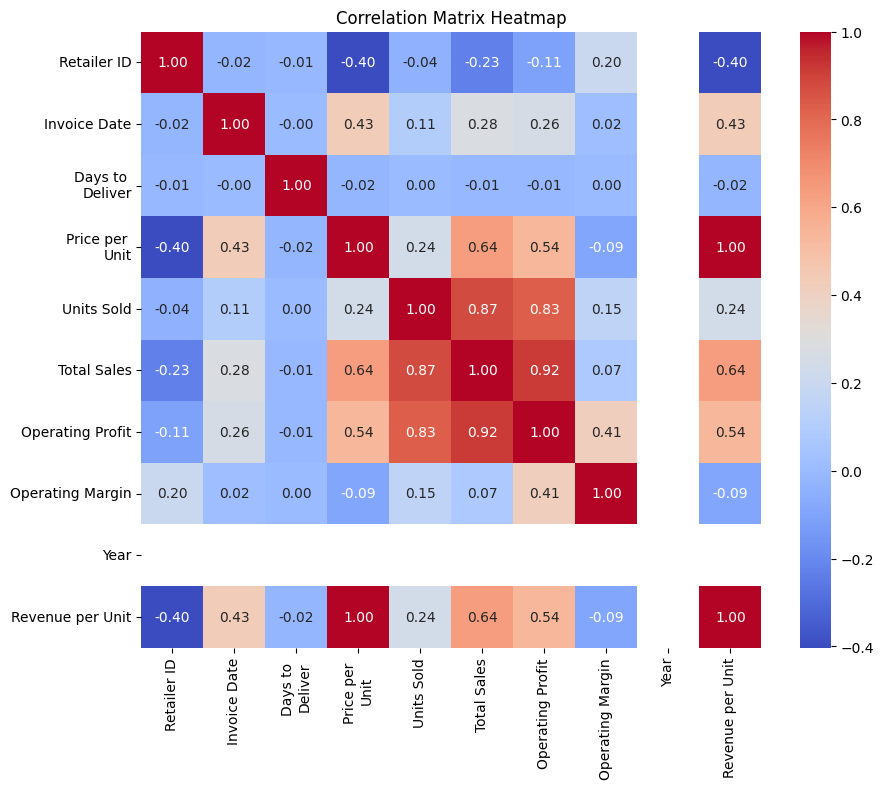

In [ ]:
# Correlation Matrix for numeric columns
numeric_df = df.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()  # Calculate correlation on numeric_df
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

<ipython-input-22-5ab19330506b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Delivery \nCompany', y='Days to \nDeliver', data=df, palette='Set2')


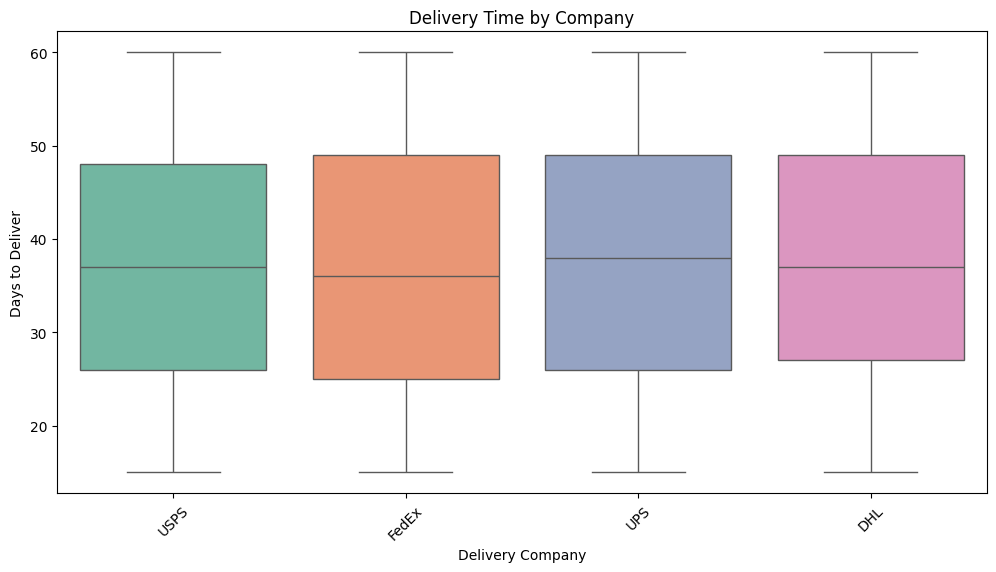

In [ ]:
# Delivery performance: Boxplot of Delivery Time by Company
if 'Delivery \nCompany' in df.columns and 'Days to \nDeliver' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Delivery \nCompany', y='Days to \nDeliver', data=df, palette='Set2')
    plt.title('Delivery Time by Company')
    plt.xlabel('Delivery Company')
    plt.ylabel('Days to Deliver')
    plt.xticks(rotation=45)
    plt.show()

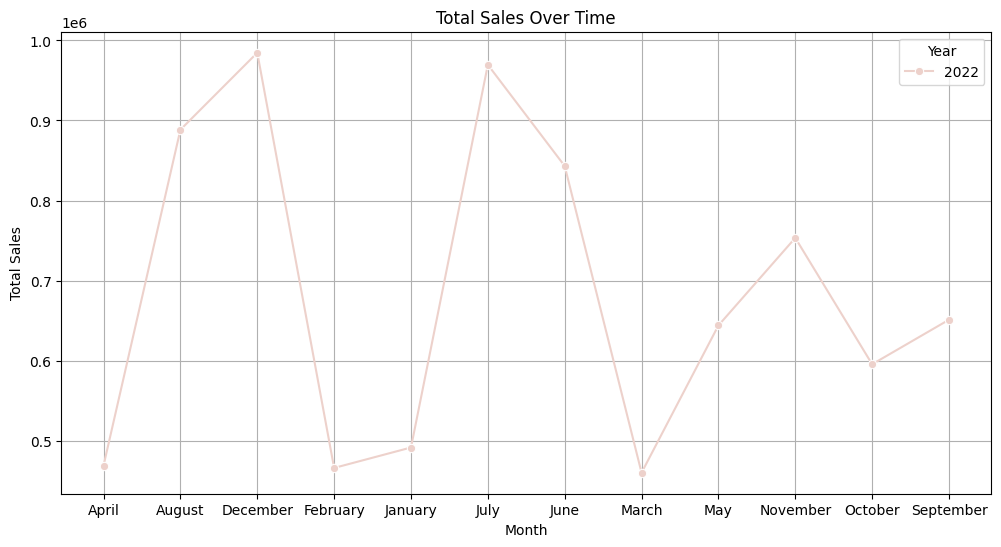

In [ ]:
# Time Series Analysis (if date information is available)
if 'Year' in df.columns and 'Month Name' in df.columns:
    time_series_data = df.groupby(['Year', 'Month Name']).agg({'Total Sales': 'sum'}).reset_index()
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=time_series_data, x='Month Name', y='Total Sales', hue='Year', marker='o')
    plt.title('Total Sales Over Time')
    plt.xlabel('Month')
    plt.ylabel('Total Sales')
    plt.legend(title='Year')
    plt.grid()
    plt.show()


In [ ]:
# Save cleaned and analyzed data to a new Excel file
output_file = 'analyzed_data.xlsx'
df.to_excel(output_file, index=False)
print(f"\nCleaned and analyzed data saved to {output_file}")


Cleaned and analyzed data saved to analyzed_data.xlsx
